In [1]:
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.applications.inception_v3 import *
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.utils import plot_model

In [2]:
model = InceptionV3(weights='imagenet')
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [3]:
# per utilizzare plot_model di Keras è necessario
# installare l'utility graphviz (https://graphviz.gitlab.io/download/#windows)
# ed aggiungere il path di installazione al path di sistema
# quindi installare tramite "pip" le librerie graphviz e pydot:
#   pip install pydot
#   pip install pydotplus
#   pip install graphviz
plot_model(model, "images/google_inception_v3.png", show_shapes=True)

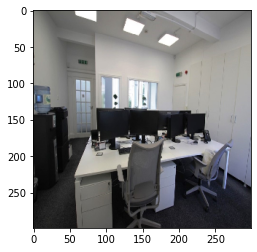

In [4]:
img = image.load_img('dataset/office.jpg', target_size=(299, 299))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [10]:
y = model.predict(x)
print(y)
decoded_predictions = decode_predictions(y, top=5)
print(decoded_predictions)

[[7.75608059e-05 2.91681044e-05 6.56124030e-05 5.49780743e-05
  8.14459709e-05 1.13191323e-04 4.26797815e-05 6.00499661e-05
  4.23187375e-05 3.34036558e-05 4.48938408e-05 4.41296797e-05
  4.10579814e-05 3.77209253e-05 8.30994832e-05 4.83724471e-05
  2.87379207e-05 4.62684620e-05 4.12846130e-05 6.23713204e-05
  6.59845755e-05 2.99335388e-05 2.26001266e-05 1.12538355e-05
  6.61143422e-05 6.11644282e-05 7.26397484e-05 2.43753966e-05
  5.23244889e-05 1.86402267e-05 9.88827087e-05 6.24843815e-05
  8.36574472e-05 5.80168853e-05 5.92375545e-05 1.17937780e-04
  1.87222948e-04 7.46081350e-05 4.69876759e-05 7.59036120e-05
  6.64421314e-05 6.07885377e-05 1.17251431e-04 9.03317341e-05
  7.01333847e-05 1.34895876e-04 7.16302893e-05 2.14801461e-04
  1.01052472e-04 6.64122199e-05 5.98655097e-05 1.17978947e-04
  3.48448921e-05 4.12720183e-05 7.48401580e-05 1.86655132e-04
  8.11610225e-05 6.93378606e-05 6.04017623e-05 1.02371129e-03
  9.35259450e-05 1.33903421e-04 6.58684512e-05 5.43422721e-05
  3.0998

In [6]:
# decoded_predictions è una lista di predizioni relativa agli esempi
# passati in input alla rete.
# nel nostro caso abbiamo fornito un singolo esempio di input, quindi
# per recuperare le relative predizioni consideriamo l'elemento
# in posizione 0 (il primo) di questa lista
for index, res in enumerate(decoded_predictions[0]):
    print('{}. {}: {:.3f}%'.format(index + 1, res[1], 100 * res[2]))

print('---')

for index, res in enumerate(decode_predictions(y, top=20)[0][5:]):
    print('{}. {}: {:.3f}%'.format(index + 6, res[1], 100 * res[2]))

1. desk: 63.735%
2. file: 11.654%
3. dining_table: 5.070%
4. folding_chair: 3.045%
5. library: 2.334%
---
6. photocopier: 1.055%
7. prison: 0.731%
8. stretcher: 0.505%
9. microwave: 0.420%
10. desktop_computer: 0.272%
11. shoji: 0.239%
12. iron: 0.202%
13. restaurant: 0.200%
14. bookcase: 0.177%
15. printer: 0.147%
16. lab_coat: 0.143%
17. wardrobe: 0.140%
18. refrigerator: 0.131%
19. safe: 0.130%
20. studio_couch: 0.125%
